## K-means 군집화
#### 필요한 패키지를 불러온다:

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
#from scipy.stats import itemfreq

#### 데이터를 불러온다:

In [2]:
os.chdir(r"D:\python_ML\python_ml_basic\data")

In [3]:
# df = pd.read_csv('data_KOSPI200_en.csv', header='infer',encoding='ISO-8859-1')
df = pd.read_csv('data_KOSPI200_en.csv', header='infer',encoding='latin1')

In [4]:
df.shape

(198, 6)

In [7]:
df.head(5)
# 한글이 안되서 영어로 일일이 바꾸셨다함..ㅎㅎ;;;;

,CODE,COMPANY,PRICE,RETURN,RISK,BETA
0,138930,BNK-FINANCE,14450.0,-0.11,0.34,-0.14
1,1040,CJ,261000.0,0.50,0.49,1.07
2,120,CJ Daehan,200000.0,0.03,0.39,0.55
3,97950,CJ Cheil,371000.0,-0.02,0.34,0.71
4,114090,GKL,33150.0,-0.06,0.43,0.65


In [8]:
header = df.columns

#### Kmeans 수익률과 리스크 기준으로 2개의 클러스터:

In [14]:
X=np.array(df.iloc[:,[3,4]]) # [수익률 리스크]
# print(X)
companies = np.array(df.iloc[:,1])
# print(companies)

In [22]:
kmeans = KMeans(n_clusters=2) # 목표 클러스터 2개
clusters = kmeans.fit(X).labels_ # 학습데이터와 시험데이터의 구분이 없다.(=X와  Y의 구분이 없다.) : 비지도학습
centers = kmeans.cluster_centers_
table = np.unique(clusters,return_counts=True)
print('Cluster Sizes :')
print(table)
print('Cluster centers :')
print(centers) 
# [[c1.수익률 c1.리스크]
#  [c2.수익률 c2.리스크]]

Cluster Sizes :
(array([0, 1]), array([ 63, 135], dtype=int64))
Cluster centers :
[[ 0.62079365  0.53380952]
 [-0.03251852  0.40481481]]


In [23]:
for i in range(2):
    print("Companies in group {} :".format(i))
    print("-----------------------------------")
    print(companies[clusters==i])
    print ("\n")

Companies in group 0 :
-----------------------------------
['CJ' 'GS Retail' 'LG Corp' 'LG Life' 'LG Health' 'LG Chem' 'S&T Motiv'
 'S&T Heavy' 'SBS' 'SKC' 'SK Innovation' 'S-Oil' 'GookDo Chem'
 'Green Cross' 'NongShim' 'Daewoong Medical' 'Daehan' 'DongAh ST'
 'DongWon F&B' 'DongWon Systems' 'Lotte Chemical' 'Lotte food' 'Moohak'
 'Boogwang Medical' 'Samgwang Glass' 'Samlip Food' 'Samsung Trade'
 'Samsung Electric' 'Samsung Precisions' 'SamYang' 'SamYang Holdings'
 'SSangYong' 'ISS DongSuh' 'S1' 'Able C&C' 'NC Soft' 'YoungJin' 'Ottoogi'
 'Orion' 'Unid' 'Yuhan' 'Ildong Medical' 'IlYnag MEdical' 'KosMAx' 'Crown'
 'Korea Danja' 'Korea Steel' 'Korea Colma' 'Korea Aero' 'Hanmi Medical'
 'HanSaem' 'Hanse' 'Hansol Chemical' 'Hansol Technics' 'Hanhwa'
 'Hanhwa Chemical' 'Hanhwa Techwin' 'Hyundai Green Food' 'Hyundai Livart'
 'Hyundai Industries' 'Hyundai Elevator' 'Hyosung' 'Foosung']


Companies in group 1 :
-----------------------------------
['BNK-FINANCE' 'CJ Daehan' 'CJ Cheil' 'GKL' 'GS' 

#### Kmeans 수익률과 리스크 기준으로 3개의 클러스터:

In [24]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit(X).labels_
centers = kmeans.cluster_centers_
table = np.unique(clusters,return_counts=True)
print('Cluster Sizes :')
print(table)
print('Cluster centers :')
print(centers)

Cluster Sizes :
(array([0, 1, 2]), array([26, 99, 73], dtype=int64))
Cluster centers :
[[ 0.88884615  0.59807692]
 [ 0.26212121  0.43414141]
 [-0.19643836  0.40753425]]


In [25]:
for i in range(3):
    print("Companies in group {} :".format(i))
    print("-----------------------------------")
    print(companies[clusters==i])
    print ("\n")

Companies in group 0 :
-----------------------------------
['GS Retail' 'LG Life' 'S-Oil' 'Daehan' 'DongWon Systems' 'Lotte Chemical'
 'Samlip Food' 'SamYang' 'SamYang Holdings' 'SSangYong' 'YoungJin'
 'Ottoogi' 'Ildong Medical' 'IlYnag MEdical' 'KosMAx' 'Crown'
 'Korea Danja' 'Korea Colma' 'Korea Aero' 'Hanmi Medical' 'HanSaem'
 'Hansol Chemical' 'Hansol Technics' 'Hanhwa Chemical' 'Hyosung' 'Foosung']


Companies in group 1 :
-----------------------------------
['CJ' 'GS' 'KT&G' 'LG' 'LG Corp' 'LG Health' 'LG UPlus' 'LG Innotech'
 'LG Housys' 'LG Chem' 'OCI' 'S&T Motiv' 'S&T Heavy' 'SBS' 'SK C&C' 'SKC'
 'SK Innovation' 'SK Chemical' 'Kangwon Land' 'KyungBang' 'Korea Zinc'
 'Korea Iron' 'GwangDong' 'GookDo Chem' 'Kia Motors' 'NamYang'
 'NamHae Chem' 'Nexxen Tire' 'Green Cross' 'NongShim' 'DaeGyo' 'DaeLim'
 'Daewoo Const' 'Daewoo Finance' 'Daewoong Medical' 'DongKook'
 'DongBu Insurance' 'DongAh Socio' 'DongAh ST' 'DongAh Tire' 'DongWon F&B'
 'Doosan' 'Lock and Lock' 'Lotte Pastry' 'Lo

#### Kmeans 최근종가,수익률, 리스크, 베타 기준으로 3개의 클러스터:

In [26]:
X=np.array(df.iloc[:,[2,3,4,5]])

In [32]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit(X).labels_
centers = kmeans.cluster_centers_
table = np.unique(clusters,return_counts=True)
print('Cluster Sizes :')
print(table)
print('Cluster centers :')
print(centers)

Cluster Sizes :
(array([0, 1, 2]), array([186,  10,   2], dtype=int64))
Cluster centers :
[[8.60467495e+04 1.64784946e-01 4.48279570e-01 9.98225806e-01]
 [9.78400000e+05 3.69000000e-01 4.14000000e-01 8.69000000e-01]
 [2.14150000e+06 1.90000000e-01 3.80000000e-01 4.15000000e-01]]


In [29]:
for i in range(3):
    print("Companies in group {} :".format(i))
    print("-----------------------------------")
    print(companies[clusters==i])
    print ("\n")

Companies in group 0 :
-----------------------------------
['LG Health' 'NHN' 'NamYang' 'Lotte food' 'Samsung Electronics'
 'YoungPoong' 'Ottoogi' 'Orion' 'Crown' 'TaeGwang']


Companies in group 1 :
-----------------------------------
['BNK-FINANCE' 'CJ' 'CJ Daehan' 'CJ Cheil' 'GKL' 'GS' 'GS Retail'
 'KB Finance' 'KCC' 'KT' 'KT&G' 'LF Mall' 'LG' 'LG Display' 'LG Corp'
 'LG Life' 'LG UPlus' 'LG Innotech' 'LG Electronics' 'LG Housys' 'LG Chem'
 'LS' 'LS Indus' 'NH Finance' 'OCI' 'POSCO' 'S&T Motiv' 'S&T Heavy' 'SBS'
 'SK C&C' 'SKC' 'SK Network' 'SK Innovation' 'SK Chemical' 'SK Telecom'
 'SK Hynix' 'S-Oil' 'Kangwon Land' 'KyungBang' 'Korea Zinc' 'Korea Iron'
 'GwangDong' 'GookDo Chem' 'Kumho Oil' 'KumHo Tire' 'Kia Motors'
 'Company Bank' 'NamHae Chem' 'Nexxen Tire' 'Green Cross' 'NongShim'
 'DaeGyo' 'DaeDuck' 'DaeLim' 'DaeSang' 'Daewoo Const'
 'Daewoo International' 'DSME' 'Daewoo Finance' 'Daewoong Medical'
 'Daehan' 'KAL' 'DongKook' 'DongBu Insurance' 'DongAh Socio' 'DongAh ST'
 'Dong

#### "Total Sum of Squares Within"을 계산하여 최적화된 클러스터 갯수를 알아낸다.

In [37]:
# 각 클러스터의 중심점과 각 클러스터의 데이터들과의 거리의 합 : tss 
def total_ss_within(X, centers, clusters):
    N_clusters = centers.shape[0]
    N_columns = centers.shape[1]
    N_rows = X.shape[0]
    ref_centers = np.zeros((N_rows, N_columns))
    for n in range(N_clusters):
        indices = (clusters == n)
        for j in range(N_columns):
            ref_centers[indices,j] = centers[n,j]
    return np.sum((X-ref_centers)**2.0)

#### Kmeans 최근종가,수익률, 리스크, 베타 기준으로 클러스터 갯수의 최적화:

In [51]:
X=np.array(df.iloc[:,[2,3,4,5]])
print(df.iloc[:3,[2,3,4,5]])

      PRICE  RETURN  RISK  BETA
0   14450.0   -0.11  0.34 -0.14
1  261000.0    0.50  0.49  1.07
2  200000.0    0.03  0.39  0.55


In [52]:
# 클러스터의 개수가 늘어날 수록, tss는 작아질 것이다. 하지만, 점점 작게 줄어들 것이다.
# 그리고, 클러스터의 개수가 많으면, 각 클러스터의 특성을 나타내는데 낭비가 생겨나게 된다.
# 그러므로 tss를 이용해, 변곡점을 찾아 최적의 클러스터 개수를 구한다.
n_cluster = np.array(range(2,20))
total_ssw = np.array([])
for n in n_cluster:
    kmeans = KMeans(n_clusters=n)
    clusters = kmeans.fit(X).labels_
    centers = kmeans.cluster_centers_ # 각 클러스터의 중심점
    total_ssw = np.append(total_ssw, total_ss_within(X,centers,clusters)) # 각 n개의 클러스터의 중심점~~요소들 거리의 합

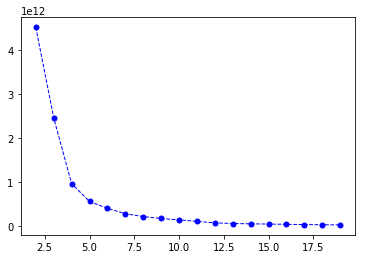

In [45]:
# 변곡점이 4~5에서 나타나기 때문에, 최적의 클러스터 개수는 4개 또는 5개이다.
plt.plot(n_cluster,total_ssw,color='blue',marker='o',linestyle='dashed',linewidth=1,markersize=5)
plt.show()